## Observations and Insights

## Dependencies and starter code

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
from sklearn import datasets
%matplotlib notebook
%matplotlib inline
from pandas.plotting import table

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
merge_data = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="left")
merge_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [4]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean = merge_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = merge_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = merge_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
stdev = merge_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = merge_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
sumstat_df = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": stdev, "SEM": sem})

sumstat_df


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

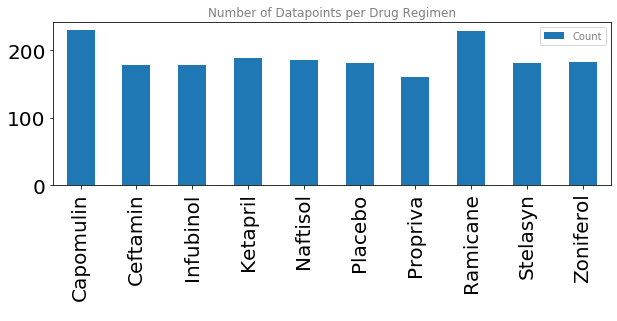

In [80]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
drugreg_df = pd.DataFrame(merge_data.groupby(["Drug Regimen"]).count()).reset_index()
#Filter DataFrame
regimen_relevant = drugreg_df[["Drug Regimen", "Mouse ID"]]
regimen_relevant = regimen_relevant.rename(columns={"Mouse ID": "Count"})
#Set index as Drug regimen
regimen_relevant = regimen_relevant.set_index("Drug Regimen")

#create bar chart
regimen_relevant.plot(kind="bar",figsize=(10,3))
#bar chart title
plt.title("Number of Datapoints per Drug Regimen")

plt.show()


In [13]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
import matplotlib.pyplot as plt

#convert drug regimens to list
drug_regimens = sumstat_df.index.tolist()
drug_regimens

['Capomulin',
 'Ceftamin',
 'Infubinol',
 'Ketapril',
 'Naftisol',
 'Placebo',
 'Propriva',
 'Ramicane',
 'Stelasyn',
 'Zoniferol']

In [14]:
drug_count = (merge_data.groupby(["Drug Regimen"])["Age_months"].count())
drug_count

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Age_months, dtype: int64

<BarContainer object of 10 artists>

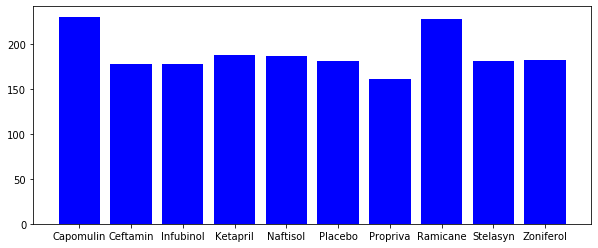

In [17]:
x_axis = np.arange(len(drug_count))
#define
x_axis = drug_regimens
plt.figure(figsize=(10,4))
plt.bar(x_axis,drug_count,color='b',alpha=1.0,align="center")

## Pie plots

In [41]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_df = pd.DataFrame(merge_data.groupby(["Sex"]).count()).reset_index()
sex_df.head()

,Sex,Mouse ID,Drug Regimen,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,Female,935,935,935,935,935,935,935
1,Male,958,958,958,958,958,958,958


In [42]:
#filter for relevant columns
sex_df = sex_df[["Sex","Mouse ID"]]
sex_df = sex_df.rename(columns={"Mouse ID": "Count"})
sex_df.head()

,Sex,Count
0,Female,935
1,Male,958


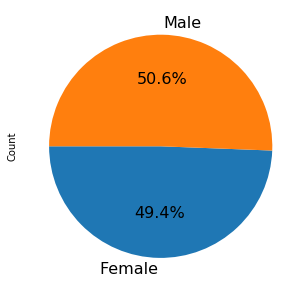

In [60]:
#plot
plt.figure(figsize=(11,9))
axl = plt.subplot(121, aspect='equal')
sex_df.plot(kind='pie',y= "Count",ax=axl, autopct='%1.1f%%',
startangle=180, shadow=False, labels=sex_df['Sex'],legend=False,fontsize=16)

In [62]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
import matplotlib.pyplot as plt
#convert columns to list
sex_count = (merge_data.groupby(["Sex"])["Age_months"].count()).tolist()
sex_count


[935, 958]

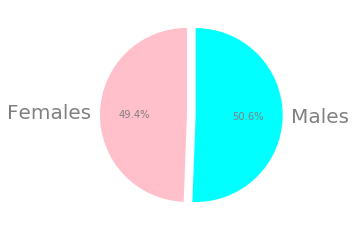

In [100]:
#labels
labels= ["Females", "Males"]
#colors
colors = ["pink", "cyan"]
#separate python section
explode = (0.1,0)

#plot 
plt.pie(sex_count,explode=explode, labels=labels, colors=colors, autopct="%1.1f%%",shadow= False, startangle= 90)
plt.rcParams.update({'text.color' : "gray",
                     'axes.labelcolor' : "white"})
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)

## Quartiles, outliers and boxplots

In [79]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
merge_data.head()
#sort data by regime, id, and time
dmt_df = merge_data.sort_values(["Drug Regimen", "Mouse ID", "Timepoint"], ascending=True)
#final volume
ftv_df = dmt_df.loc[dmt_df["Timepoint"] ==45]
ftv_df.head().reset_index()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,309,b128,Capomulin,Female,9,22,45,38.982878,2
1,299,b742,Capomulin,Male,7,21,45,38.939633,0
2,244,g288,Capomulin,Male,3,19,45,37.074024,1
3,360,g316,Capomulin,Female,22,22,45,40.159220,2
4,440,i557,Capomulin,Female,1,24,45,47.685963,1


In [84]:
#capomulin regimen dataframe
capomulin_df = ftv_df[ftv_df['Drug Regimen'].isin(['Capomulin'])]
capomulin_df.head().reset_index()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,309,b128,Capomulin,Female,9,22,45,38.982878,2
1,299,b742,Capomulin,Male,7,21,45,38.939633,0
2,244,g288,Capomulin,Male,3,19,45,37.074024,1
3,360,g316,Capomulin,Female,22,22,45,40.159220,2
4,440,i557,Capomulin,Female,1,24,45,47.685963,1


In [85]:
#Convert tumor volume into df 
captv_list = capomulin_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
captv_list = captv_list["Tumor Volume (mm3)"]
captv_list

0     23.343598
1     28.430964
2     28.484033
3     31.023923
4     31.896238
5     32.377357
6     33.329098
7     34.455298
8     36.041047
9     37.074024
10    37.311846
11    38.125164
12    38.846876
13    38.939633
14    38.982878
15    40.159220
16    40.658124
17    40.728578
18    41.483008
19    41.581521
20    47.685963
Name: Tumor Volume (mm3), dtype: float64

In [89]:
#quartile calculations
quartiles = captv_list.quantile([.25,.5,.75])
lower = quartiles[0.25]
upper = quartiles[0.75]
iqr = upper-lower

print(f" The lower quartile of Tumor Volume (in mm3) is: {lower}")
print(f" The upper quartile of Tumor Volume (in mm3) is: {upper}")
print(f" The interquartile range of Tumor Volume (in mm3) is: {iqr}")
print(f" The median of Tumor Volume (in mm3) is: {quartiles[0.5]}")

lower_bound = lower - (1.5*iqr)
upper_bound = upper + (1.5*iqr)
print(f"Values below {lower_bound} are potential outliers")
print(f"Values below {upper_bound} are potential outliers")

 The lower quartile of Tumor Volume (in mm3) is: 32.37735684
 The upper quartile of Tumor Volume (in mm3) is: 40.1592203
 The interquartile range of Tumor Volume (in mm3) is: 7.781863460000004
 The median of Tumor Volume (in mm3) is: 37.31184577
Values below 20.70456164999999 are outliers
Values below 51.83201549 are outliers


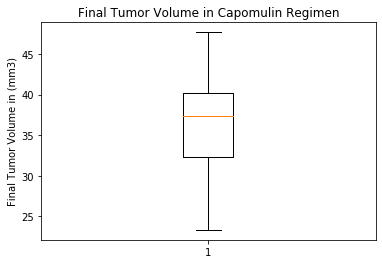

In [98]:
#Outlier plot
fig1, ax = plt.subplots()
ax.set_title('Final Tumor Volume in Capomulin Regimen')
ax.set_ylabel('Final Tumor Volume in (mm3)')
ax.boxplot(captv_list)
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10)
plt.rcParams.update({'text.color' : "black",
                     'axes.labelcolor' : "black"})
plt.show()

In [101]:
#Ramicane regimen dataframe
ramicane_df = ftv_df[ftv_df['Drug Regimen'].isin(['Ramicane'])]
ramicane_df.head().reset_index()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,327,a411,Ramicane,Male,3,22,45,38.407618,1
1,430,a444,Ramicane,Female,10,25,45,43.047543,0
2,214,a520,Ramicane,Male,13,21,45,38.810366,1
3,174,a644,Ramicane,Female,7,17,45,32.978522,1
4,154,c758,Ramicane,Male,9,17,45,33.397653,1


In [105]:
#Convert tumor volume into df 
ramtv_list = ramicane_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
ramtv_list = ramtv_list["Tumor Volume (mm3)"]
ramtv_list

0     22.050126
1     29.128472
2     30.276232
3     30.564625
4     30.638696
5     31.095335
6     31.560470
7     32.978522
8     33.397653
9     33.562402
10    36.134852
11    36.374510
12    37.225650
13    37.311236
14    38.407618
15    38.810366
16    40.659006
17    40.667713
18    43.047543
19    45.220869
Name: Tumor Volume (mm3), dtype: float64

In [106]:
#quartile calculations
quartiles = ramtv_list.quantile([.25,.5,.75])
lower = quartiles[0.25]
upper = quartiles[0.75]
iqr = upper-lower

print(f" The lower quartile of Tumor Volume (in mm3) is: {lower}")
print(f" The upper quartile of Tumor Volume (in mm3) is: {upper}")
print(f" The interquartile range of Tumor Volume (in mm3) is: {iqr}")
print(f" The median of Tumor Volume (in mm3) is: {quartiles[0.5]}")

lower_bound = lower - (1.5*iqr)
upper_bound = upper + (1.5*iqr)
print(f"Values below {lower_bound} are potential outliers")
print(f"Values below {upper_bound} are potential outliers")

 The lower quartile of Tumor Volume (in mm3) is: 30.981175224999998
 The upper quartile of Tumor Volume (in mm3) is: 38.508305307499995
 The interquartile range of Tumor Volume (in mm3) is: 7.527130082499998
 The median of Tumor Volume (in mm3) is: 34.848627300000004
Values below 19.690480101250003 are potential outliers
Values below 49.79900043124999 are potential outliers


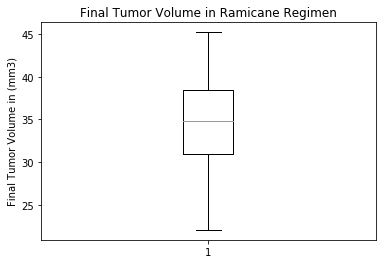

In [109]:
#Outlier plot
fig2, ax = plt.subplots()
ax.set_title('Final Tumor Volume in Ramicane Regimen')
ax.set_ylabel('Final Tumor Volume in (mm3)')
ax.boxplot(ramtv_list)
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10)
plt.rcParams.update({'text.color' : "black",
                     'axes.labelcolor' : "black"})
plt.show()

In [112]:
#infubinol regimen dataframe
infubinol_df = ftv_df[ftv_df['Drug Regimen'].isin(['Infubinol'])]
infubinol_df.head().reset_index()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,463,a203,Infubinol,Female,20,23,45,67.973419,2
1,473,a251,Infubinol,Female,21,25,45,65.525743,1
2,540,a685,Infubinol,Male,8,30,45,66.083066,3
3,637,c139,Infubinol,Male,11,28,45,72.226731,2
4,800,e476,Infubinol,Male,23,26,45,62.435404,1


In [113]:
#Convert tumor volume into df 
inftv_list = infubinol_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
inftv_list = inftv_list["Tumor Volume (mm3)"]
inftv_list

0    60.918767
1    62.435404
2    62.754451
3    65.525743
4    66.083066
5    66.196912
6    67.685569
7    67.973419
8    72.226731
Name: Tumor Volume (mm3), dtype: float64

In [114]:
#quartile calculations
quartiles = inftv_list.quantile([.25,.5,.75])
lower = quartiles[0.25]
upper = quartiles[0.75]
iqr = upper-lower

print(f" The lower quartile of Tumor Volume (in mm3) is: {lower}")
print(f" The upper quartile of Tumor Volume (in mm3) is: {upper}")
print(f" The interquartile range of Tumor Volume (in mm3) is: {iqr}")
print(f" The median of Tumor Volume (in mm3) is: {quartiles[0.5]}")

lower_bound = lower - (1.5*iqr)
upper_bound = upper + (1.5*iqr)
print(f"Values below {lower_bound} are potential outliers")
print(f"Values below {upper_bound} are potential outliers")

 The lower quartile of Tumor Volume (in mm3) is: 62.75445141
 The upper quartile of Tumor Volume (in mm3) is: 67.68556862
 The interquartile range of Tumor Volume (in mm3) is: 4.9311172099999965
 The median of Tumor Volume (in mm3) is: 66.08306589
Values below 55.35777559500001 are potential outliers
Values below 75.08224443499999 are potential outliers


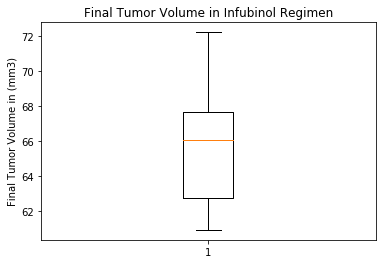

In [115]:
#Outlier plot
fig2, ax = plt.subplots()
ax.set_title('Final Tumor Volume in Infubinol Regimen')
ax.set_ylabel('Final Tumor Volume in (mm3)')
ax.boxplot(inftv_list)
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10)
plt.rcParams.update({'text.color' : "black",
                     'axes.labelcolor' : "black"})
plt.show()

In [117]:
#ceftamin regimen dataframe
ceftamin_df = ftv_df[ftv_df['Drug Regimen'].isin(['Ceftamin'])]
ceftamin_df.head().reset_index()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,493,a275,Ceftamin,Female,20,28,45,62.999356,3
1,993,j296,Ceftamin,Female,24,30,45,61.849023,3
2,1033,k210,Ceftamin,Male,15,28,45,68.923185,3
3,1112,l471,Ceftamin,Female,7,28,45,67.748662,1
4,1132,l661,Ceftamin,Male,18,26,45,59.851956,3


In [118]:
#Convert tumor volume into df 
ceftv_list = ceftamin_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
ceftv_list = ceftv_list["Tumor Volume (mm3)"]
ceftv_list

0     59.741901
1     59.851956
2     61.386660
3     61.433892
4     61.849023
5     62.999356
6     64.299830
7     64.634949
8     64.729837
9     67.527482
10    67.748662
11    68.594745
12    68.923185
Name: Tumor Volume (mm3), dtype: float64

In [123]:
#quartile calculations
quartiles = ceftv_list.quantile([.25,.5,.75])
lower = quartiles[0.25]
upper = quartiles[0.75]
iqr = upper-lower

print(f" The lower quartile of Tumor Volume (in mm3) is: {lower}")
print(f" The upper quartile of Tumor Volume (in mm3) is: {upper}")
print(f" The interquartile range of Tumor Volume (in mm3) is: {iqr}")
print(f" The median of Tumor Volume (in mm3) is: {quartiles[0.5]}")

lower_bound = lower - (1.5*iqr)
upper_bound = upper + (1.5*iqr)
print(f"Values below {lower_bound} are potential outliers")
print(f"Values below {upper_bound} are potential outliers")

 The lower quartile of Tumor Volume (in mm3) is: 61.43389223
 The upper quartile of Tumor Volume (in mm3) is: 67.52748237
 The interquartile range of Tumor Volume (in mm3) is: 6.093590140000003
 The median of Tumor Volume (in mm3) is: 64.29983003
Values below 52.29350701999999 are potential outliers
Values below 76.66786758 are potential outliers


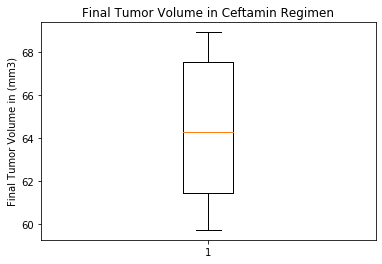

In [120]:
#Outlier plot
fig3, ax = plt.subplots()
ax.set_title('Final Tumor Volume in Ceftamin Regimen')
ax.set_ylabel('Final Tumor Volume in (mm3)')
ax.boxplot(ceftv_list)
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10)
plt.rcParams.update({'text.color' : "black",
                     'axes.labelcolor' : "black"})
plt.show()

In [121]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
#ketapril regimen dataframe
ketapril_df = ftv_df[ftv_df['Drug Regimen'].isin(['Ketapril'])]
ketapril_df.head().reset_index()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,735,c832,Ketapril,Male,18,29,45,65.415955,3
1,884,g497,Ketapril,Male,19,28,45,69.872251,2
2,930,h246,Ketapril,Male,13,30,45,74.104086,2
3,1043,k382,Ketapril,Male,22,29,45,73.715619,4
4,1193,m550,Ketapril,Male,18,28,45,69.253503,4


In [122]:
#Convert tumor volume into df 
kettv_list = ketapril_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
kettv_list = kettv_list["Tumor Volume (mm3)"]
kettv_list

0     62.909441
1     65.415955
2     66.268801
3     67.989530
4     69.253503
5     69.872251
6     73.715619
7     73.901399
8     74.104086
9     75.294936
10    78.567014
Name: Tumor Volume (mm3), dtype: float64

In [124]:
#quartile calculations
quartiles = kettv_list.quantile([.25,.5,.75])
lower = quartiles[0.25]
upper = quartiles[0.75]
iqr = upper-lower

print(f" The lower quartile of Tumor Volume (in mm3) is: {lower}")
print(f" The upper quartile of Tumor Volume (in mm3) is: {upper}")
print(f" The interquartile range of Tumor Volume (in mm3) is: {iqr}")
print(f" The median of Tumor Volume (in mm3) is: {quartiles[0.5]}")

lower_bound = lower - (1.5*iqr)
upper_bound = upper + (1.5*iqr)
print(f"Values below {lower_bound} are potential outliers")
print(f"Values below {upper_bound} are potential outliers")

 The lower quartile of Tumor Volume (in mm3) is: 67.12916566999999
 The upper quartile of Tumor Volume (in mm3) is: 74.002742395
 The interquartile range of Tumor Volume (in mm3) is: 6.873576725000007
 The median of Tumor Volume (in mm3) is: 69.87225079
Values below 56.81880058249998 are potential outliers
Values below 84.31310748250002 are potential outliers


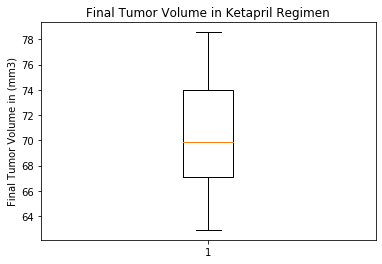

In [126]:
#Outlier plot
fig1i, ax = plt.subplots()
ax.set_title('Final Tumor Volume in Ketapril Regimen')
ax.set_ylabel('Final Tumor Volume in (mm3)')
ax.boxplot(kettv_list)
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10)
plt.rcParams.update({'text.color' : "black",
                     'axes.labelcolor' : "black"})
plt.show()

In [127]:
#naftisol regimen dataframe
naftisol_df = ftv_df[ftv_df['Drug Regimen'].isin(['Naftisol'])]
naftisol_df.head().reset_index()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,567,a818,Naftisol,Female,12,28,45,74.997764,2
1,610,b559,Naftisol,Male,20,26,45,73.051363,1
2,774,e213,Naftisol,Male,8,27,45,63.105696,4
3,810,e584,Naftisol,Male,9,27,45,68.359777,4
4,1013,j755,Naftisol,Male,23,27,45,69.563621,1


In [128]:
#Convert tumor volume into df 
naftv_list = naftisol_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
naftv_list = naftv_list["Tumor Volume (mm3)"]
naftv_list

0     62.670759
1     63.105696
2     63.586395
3     63.946640
4     65.741070
5     68.359777
6     69.563621
7     69.778544
8     73.051363
9     73.867845
10    74.997764
11    75.113288
12    76.668817
Name: Tumor Volume (mm3), dtype: float64

In [129]:
#quartile calculations
quartiles = naftv_list.quantile([.25,.5,.75])
lower = quartiles[0.25]
upper = quartiles[0.75]
iqr = upper-lower

print(f" The lower quartile of Tumor Volume (in mm3) is: {lower}")
print(f" The upper quartile of Tumor Volume (in mm3) is: {upper}")
print(f" The interquartile range of Tumor Volume (in mm3) is: {iqr}")
print(f" The median of Tumor Volume (in mm3) is: {quartiles[0.5]}")

lower_bound = lower - (1.5*iqr)
upper_bound = upper + (1.5*iqr)
print(f"Values below {lower_bound} are potential outliers")
print(f"Values below {upper_bound} are potential outliers")

 The lower quartile of Tumor Volume (in mm3) is: 63.94664044
 The upper quartile of Tumor Volume (in mm3) is: 73.86784476
 The interquartile range of Tumor Volume (in mm3) is: 9.921204319999994
 The median of Tumor Volume (in mm3) is: 69.56362076
Values below 49.064833960000016 are potential outliers
Values below 88.74965123999999 are potential outliers


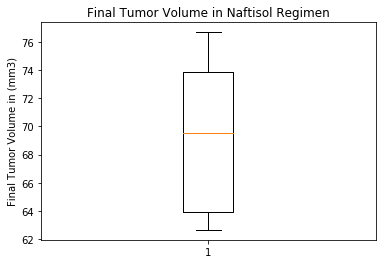

In [130]:
#Outlier plot
fig2i, ax = plt.subplots()
ax.set_title('Final Tumor Volume in Naftisol Regimen')
ax.set_ylabel('Final Tumor Volume in (mm3)')
ax.boxplot(naftv_list)
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10)
plt.rcParams.update({'text.color' : "black",
                     'axes.labelcolor' : "black"})
plt.show()

In [131]:
#propriva regimen dataframe
propriva_df = ftv_df[ftv_df['Drug Regimen'].isin(['Propriva'])]
propriva_df.head().reset_index()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,550,a699,Propriva,Female,5,28,45,62.191414,1
1,903,g570,Propriva,Male,16,29,45,70.492788,2
2,962,i635,Propriva,Male,21,26,45,58.633404,3
3,1290,o562,Propriva,Female,4,25,45,72.455421,2
4,1540,t198,Propriva,Male,22,26,45,64.911363,4


In [132]:
#Convert tumor volume into df 
protv_list = propriva_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
protv_list = protv_list["Tumor Volume (mm3)"]
protv_list

0    58.633404
1    62.191414
2    64.911363
3    64.957562
4    70.167749
5    70.492788
6    72.455421
Name: Tumor Volume (mm3), dtype: float64

In [133]:
#quartile calculations
quartiles = protv_list.quantile([.25,.5,.75])
lower = quartiles[0.25]
upper = quartiles[0.75]
iqr = upper-lower

print(f" The lower quartile of Tumor Volume (in mm3) is: {lower}")
print(f" The upper quartile of Tumor Volume (in mm3) is: {upper}")
print(f" The interquartile range of Tumor Volume (in mm3) is: {iqr}")
print(f" The median of Tumor Volume (in mm3) is: {quartiles[0.5]}")

lower_bound = lower - (1.5*iqr)
upper_bound = upper + (1.5*iqr)
print(f"Values below {lower_bound} are potential outliers")
print(f"Values below {upper_bound} are potential outliers")

 The lower quartile of Tumor Volume (in mm3) is: 63.55138852499999
 The upper quartile of Tumor Volume (in mm3) is: 70.33026831000001
 The interquartile range of Tumor Volume (in mm3) is: 6.778879785000015
 The median of Tumor Volume (in mm3) is: 64.95756185
Values below 53.38306884749997 are potential outliers
Values below 80.49858798750003 are potential outliers


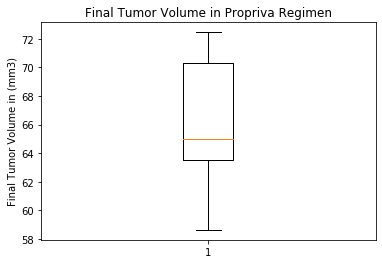

In [134]:
#Outlier plot
fig3i, ax = plt.subplots()
ax.set_title('Final Tumor Volume in Propriva Regimen')
ax.set_ylabel('Final Tumor Volume in (mm3)')
ax.boxplot(protv_list)
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10)
plt.rcParams.update({'text.color' : "black",
                     'axes.labelcolor' : "black"})
plt.show()

In [135]:
#Zoniferol regimen dataframe
zoniferol_df = ftv_df[ftv_df['Drug Regimen'].isin(['Zoniferol'])]
zoniferol_df.head().reset_index()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,510,a401,Zoniferol,Female,8,25,45,66.794156,4
1,647,c264,Zoniferol,Female,11,27,45,67.942121,2
2,667,c302,Zoniferol,Female,10,29,45,64.575222,4
3,689,c559,Zoniferol,Female,19,28,45,61.840058,4
4,850,f545,Zoniferol,Female,20,26,45,73.324432,1


In [136]:
#Convert tumor volume into df 
zontv_list = zoniferol_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
zontv_list = zontv_list["Tumor Volume (mm3)"]
zontv_list 

0     60.752704
1     61.840058
2     62.109651
3     62.327966
4     63.488697
5     64.294085
6     64.575222
7     66.794156
8     67.942121
9     68.163195
10    68.401286
11    68.611061
12    70.827796
13    73.324432
Name: Tumor Volume (mm3), dtype: float64

In [137]:
#quartile calculations
quartiles = zontv_list.quantile([.25,.5,.75])
lower = quartiles[0.25]
upper = quartiles[0.75]
iqr = upper-lower

print(f" The lower quartile of Tumor Volume (in mm3) is: {lower}")
print(f" The upper quartile of Tumor Volume (in mm3) is: {upper}")
print(f" The interquartile range of Tumor Volume (in mm3) is: {iqr}")
print(f" The median of Tumor Volume (in mm3) is: {quartiles[0.5]}")

lower_bound = lower - (1.5*iqr)
upper_bound = upper + (1.5*iqr)
print(f"Values below {lower_bound} are potential outliers")
print(f"Values below {upper_bound} are potential outliers")

 The lower quartile of Tumor Volume (in mm3) is: 62.61814874
 The upper quartile of Tumor Volume (in mm3) is: 68.34176324
 The interquartile range of Tumor Volume (in mm3) is: 5.723614500000004
 The median of Tumor Volume (in mm3) is: 65.68468877999999
Values below 54.03272699 are potential outliers
Values below 76.92718499000001 are potential outliers


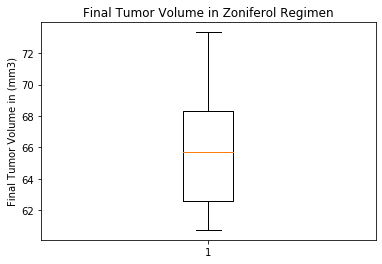

In [138]:
#Outlier plot
fig4i, ax = plt.subplots()
ax.set_title('Final Tumor Volume in Zoniferol Regimen')
ax.set_ylabel('Final Tumor Volume in (mm3)')
ax.boxplot(zontv_list)
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10)
plt.rcParams.update({'text.color' : "black",
                     'axes.labelcolor' : "black"})
plt.show()

## Line and scatter plots

In [145]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomouse_df = merge_data.loc[merge_data["Drug Regimen"]=="Capomulin"]
capomouse_df = capomouse_df.reset_index()
capomouse_df.head()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,10,s185,Capomulin,Female,3,17,0,45.000000,0
1,11,s185,Capomulin,Female,3,17,5,43.878496,0
2,12,s185,Capomulin,Female,3,17,10,37.614948,0
3,13,s185,Capomulin,Female,3,17,15,38.177232,0
4,14,s185,Capomulin,Female,3,17,20,36.866876,0


In [148]:
#single mouse
capo1_df= capomouse_df.loc[capomouse_df["Mouse ID"]== "b128"]
capo1_df

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
135,300,b128,Capomulin,Female,9,22,0,45.000000,0
136,301,b128,Capomulin,Female,9,22,5,45.651331,0
137,302,b128,Capomulin,Female,9,22,10,43.270852,0
138,303,b128,Capomulin,Female,9,22,15,43.784893,0
139,304,b128,Capomulin,Female,9,22,20,42.731552,0
140,305,b128,Capomulin,Female,9,22,25,43.262145,1
141,306,b128,Capomulin,Female,9,22,30,40.605335,1
142,307,b128,Capomulin,Female,9,22,35,37.967644,1
143,308,b128,Capomulin,Female,9,22,40,38.379726,2
144,309,b128,Capomulin,Female,9,22,45,38.982878,2


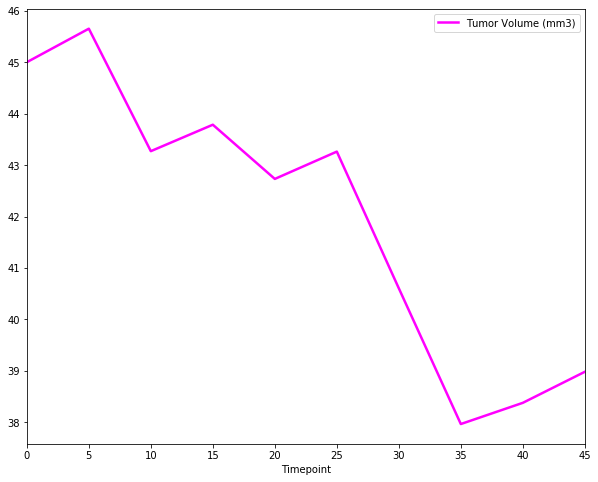

In [167]:
#time vs tumor
capo1_df = capo1_df.loc[:,["Timepoint", "Tumor Volume (mm3)"]]
#reset index
#cap1_df=cap1_df.reset_index(drop=True)
#line plot
capo1_df.set_index('Timepoint').plot(figsize= (10,8), linewidth=2.5, color= 'magenta')

In [168]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomouse_df.head()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,10,s185,Capomulin,Female,3,17,0,45.000000,0
1,11,s185,Capomulin,Female,3,17,5,43.878496,0
2,12,s185,Capomulin,Female,3,17,10,37.614948,0
3,13,s185,Capomulin,Female,3,17,15,38.177232,0
4,14,s185,Capomulin,Female,3,17,20,36.866876,0


In [169]:
mouselb_df = capomouse_df.loc[:,["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
mouselb_df.head()

,Mouse ID,Weight (g),Tumor Volume (mm3)
0,s185,17,45.000000
1,s185,17,43.878496
2,s185,17,37.614948
3,s185,17,38.177232
4,s185,17,36.866876


In [173]:
#Average tumor volume per Capomulin mouse
avg_tuvol = pd.DataFrame(mouselb_df.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean()).reset_index()
#rename avg column
avg_tuvol = avg_tuvol.rename(columns={"Tumor Volume (mm3)": "Average Volume"})
avg_tuvol.head()

,Mouse ID,Weight (g),Average Volume
0,b128,22,41.963636
1,b742,21,40.083699
2,f966,17,36.505973
3,g288,19,41.990097
4,g316,22,44.613344


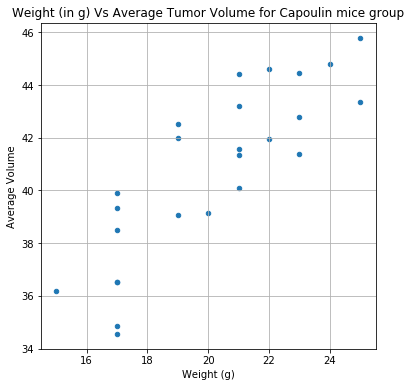

In [186]:
#plot
avg_tuvol.plot(kind="scatter",x="Weight (g)", y= "Average Volume", grid=True, figsize =(6,6),
               title= "Weight (in g) Vs Average Tumor Volume for Capoulin mice group"
        )
plt.show()

In [190]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
import matplotlib.pyplot as plt

#correlation coefficient of mouse weight and avg tumor volume

mouse_wt = avg_tuvol.iloc[:,0]
avg_tumorvol= avg_tuvol.iloc[:,1]
correlation = st.pearsonr(mouse_wt, avg_tumorvol)
print(f"The correlation coefficient between both factors is {round(correlation[0],2)}")

The correlation coefficient between both factors is 0.84


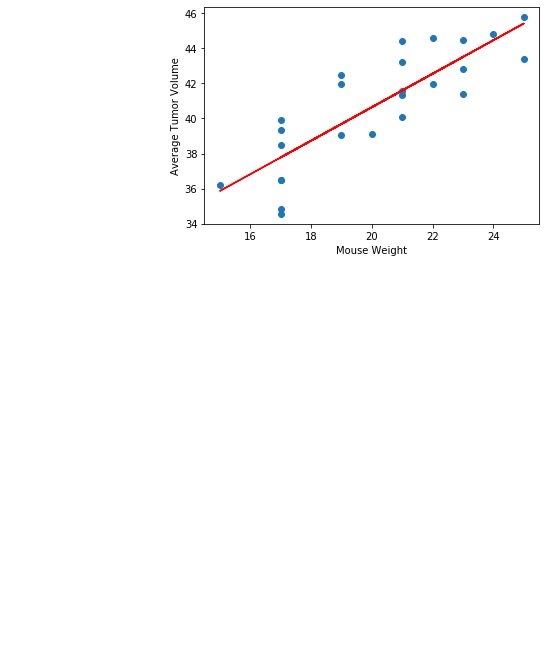

In [195]:
#linear regression 
x_val= avg_tuvol['Weight (g)']
y_val= avg_tuvol['Average Volume']
(slope, intercept, rvalue, pvalue,stderr)= linregress(x_val,y_val)
regression=x_val * slope + intercept
linear_eq = "y = " +str(round(slope,2)) + "x+ " + str(round(intercept,2))
plt.scatter(x_val,y_val)
plt.plot(x_val,regression,"r-")
plt.annotate(linear_eq,(8,10),fontsize=20,color="red")
plt.xlabel('Mouse Weight')
plt.ylabel('Average Tumor Volume')
plt.show()